<a href="https://colab.research.google.com/github/pvn-leo/DataAnalytics/blob/master/US_accidents_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

Kaggle ---> [link](https://www.kaggle.com/sobhanmoosavi/us-accidents)

In [1]:
from google.colab import drive
drive.mount('/content/drive', 
force_remount = True)

Mounted at /content/drive


In [2]:
cd

/root


In [3]:
cd /content/drive/My Drive/da5

/content/drive/My Drive/da5


In [4]:
!ls

'DA literature survey.docx'   US_accidents_1
 data1.csv.zip		      US_accidents1.csv
 general_report.gdoc	      US_Accidents_June20.csv
 _Goal_Diggers_Stage1.docx


In [5]:
#!unzip data1.csv.zip

# Imports

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

In [7]:
# df=pd.read_csv('./US_Accidents_June20.csv')
df1=pd.read_csv('./US_accidents1.csv')

In [ ]:
#df1.head(10)

In [ ]:
print("Rows : ", df1.shape[0])
print("Columns : ", df1.shape[1])
#print('\nUnique values :  \n',df.nunique())

Rows :  3513501
Columns :  32


In [ ]:
#lowercase all the columns of the dataset
#df1.columns = map(str.lower, df1.columns)
#print(df1.columns)

In [ ]:
df1.describe(include='O').T

,count,unique,top,freq
id,3513501,3513501,A-1109123,1
source,3513501,3,MapQuest,2414247
start_time,3513501,3199961,2017-05-15 09:22:55,74
end_time,3513501,3246037,2017-05-15 15:22:55,73
description,3513501,1780039,At I-15 - Accident.,2123
side,3513501,3,R,2879682
city,3513501,11894,Houston,101239
state,3513501,49,CA,816817
wind_direction,3454628,24,Calm,368272
weather_condition,3437369,127,Clear,808173


In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,3513501.0,1.756803e+06,1.014289e+06,0.000000,878408.000000,1.756798e+06,2.635197e+06,3.513616e+06
severity,3513501.0,2.339925e+00,5.521831e-01,1.000000,2.000000,2.000000e+00,3.000000e+00,4.000000e+00
start_lat,3513501.0,3.654195e+01,4.883502e+00,24.555269,33.637840,3.591671e+01,4.032212e+01,4.900220e+01
start_lng,3513501.0,-9.579197e+01,1.736875e+01,-124.623833,-117.441948,-9.102632e+01,-8.093315e+01,-6.711317e+01
temperature(f),3447773.0,6.193508e+01,1.862113e+01,-89.000000,50.000000,6.400000e+01,7.590000e+01,1.706000e+02
humidity(%),3443818.0,6.511412e+01,2.275558e+01,1.000000,48.000000,6.700000e+01,8.400000e+01,1.000000e+02
pressure(in),3457624.0,2.974463e+01,8.319787e-01,0.000000,29.730000,2.995000e+01,3.009000e+01,5.774000e+01
visibility(mi),3437649.0,9.122658e+00,2.885884e+00,0.000000,10.000000,1.000000e+01,1.000000e+01,1.400000e+02
wind_speed(mph),3058906.0,8.219024e+00,5.262867e+00,0.000000,5.000000,7.000000e+00,1.150000e+01,9.840000e+02


In [ ]:
corr = df1.corr()

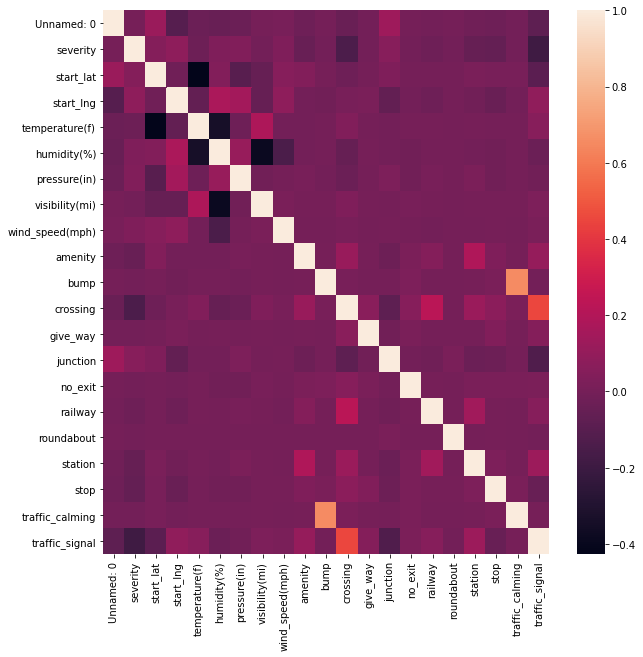

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr)

In [ ]:
def corr_plot(data, title, method='pearson', figsize=(13,8)):
    """
    Plot the correlation matrix
    """
    mname = {
        'pearson': 'Pearson correlation',
        'kendall': 'Kendall Tau correlation',
        'spearman': 'Spearman rank correlation'
    }
    corr = data.corr(method=method)
    fig, (ax) = plt.subplots(1, 1, figsize=figsize)
    ax.set_title("{} ({})".format(title, mname[method]))
    ax = sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right'
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    )
    ax.set_ylim(corr.shape[0], 0)
    return fig, (ax)

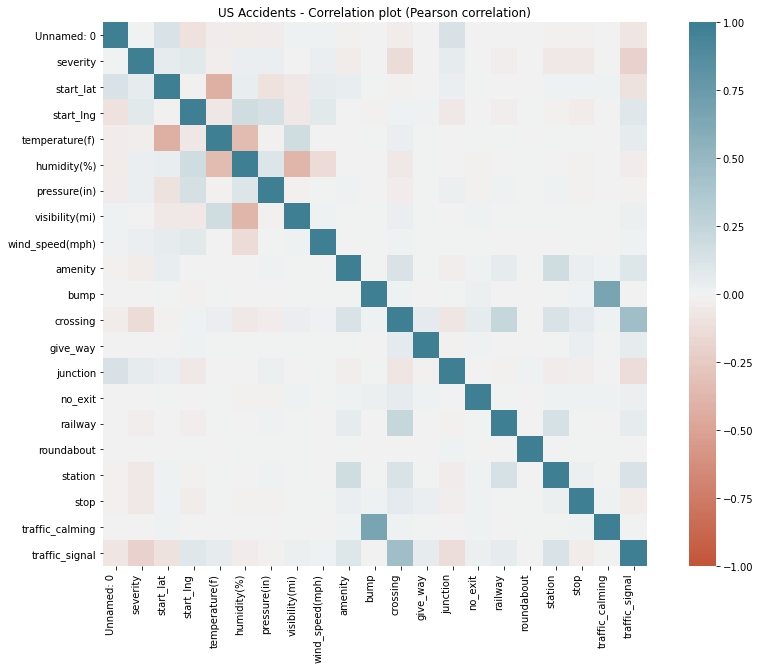

In [ ]:
#_ = corr_plot(df.drop(['start_time', 'end_time', 'weather_timestamp'], axis=1), title='Correlation plot', method='pearson', figsize=(15, 10))
_ = corr_plot(df1, title='US Accidents - Correlation plot', method='pearson', figsize=(15, 10))

# Hst-Bar-Line plots

In [ ]:
df1.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

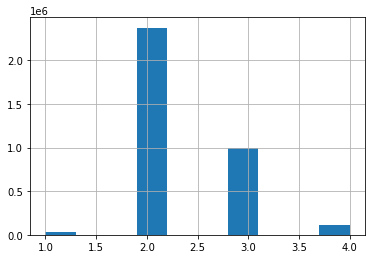

In [ ]:
# plot a histogram  
df1['severity'].hist(bins=10) 

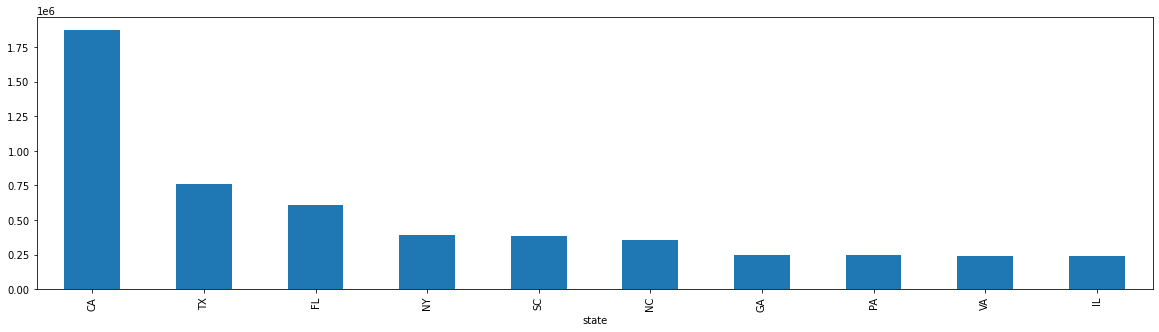

In [ ]:
plt.figure(figsize =(20,5))
df1.groupby(['state' ])['severity'].sum().sort_values(ascending=False).head(10).plot.bar()

In [ ]:
plt.figure(figsize =(10,5))
df.groupby(['Sunrise_Sunset'])['Severity'].size().sort_values(ascending=False).plot.pie()

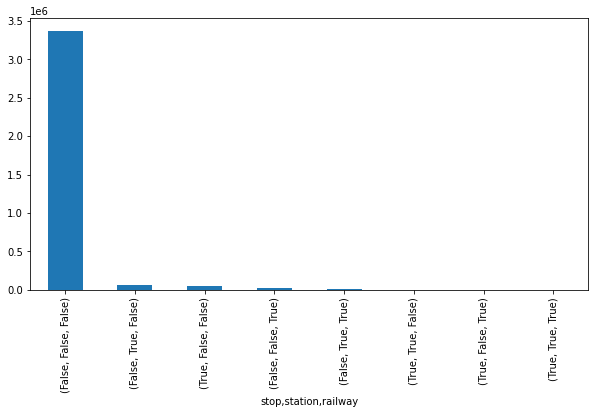

In [ ]:
plt.figure(figsize =(10,5))
df1.groupby(['stop', 'station', 'railway' ])['severity'].size().sort_values(ascending=False).plot.bar()

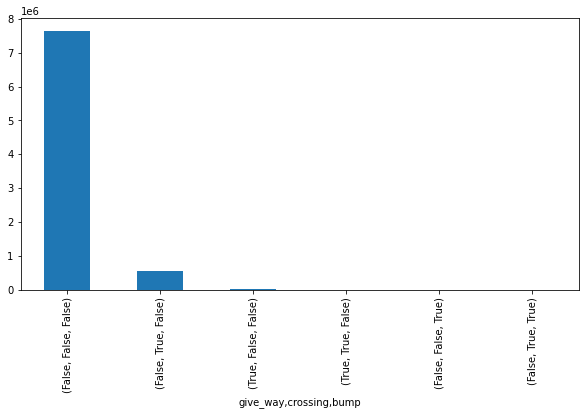

In [ ]:
plt.figure(figsize =(10,5))
df1.groupby(['give_way', 'crossing','bump' ])['severity'].sum().sort_values(ascending=False).plot.bar()

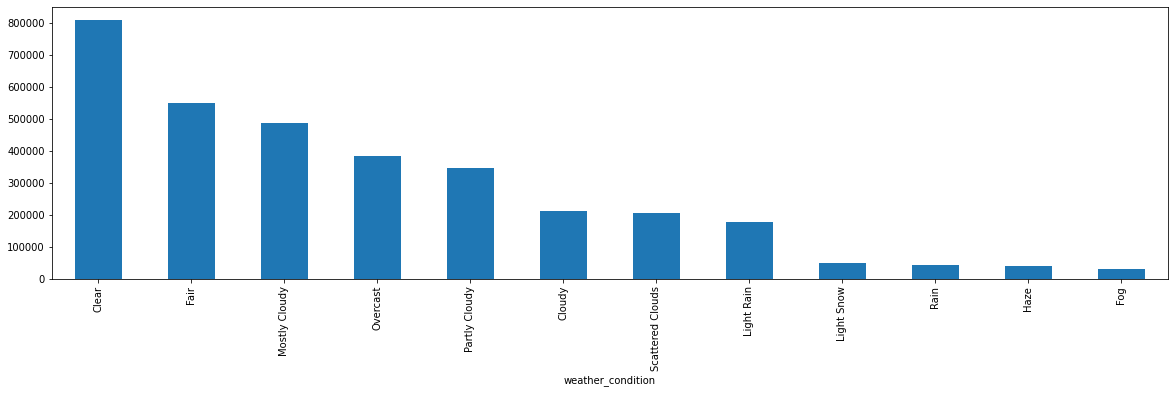

In [ ]:
plt.figure(figsize =(20,5))
df1.groupby(['weather_condition']).size().sort_values(ascending=False).head(12).plot.bar()

In [82]:
import datetime
df = df1
df['start_time']= pd.to_datetime(df['start_time'])
df['hour']= df['start_time'].dt.hour
df['year']= df['start_time'].dt.year
df['month']= df['start_time'].dt.month
df['week']= df['start_time'].dt.week
df['quarter']= df['start_time'].dt.quarter
df['time_zone']= df['start_time'].dt.tz
df['time']= df['start_time'].dt.time
df['day']= df['start_time'].dt.day_name()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  import sys


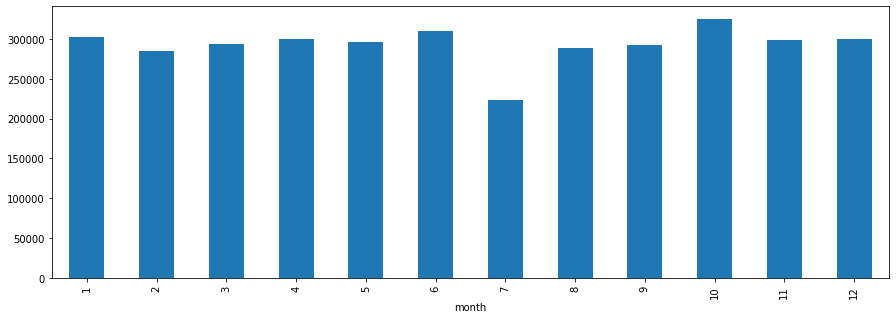

In [83]:
plt.figure(figsize =(15,5))
df.groupby(['month']).size().plot.bar()

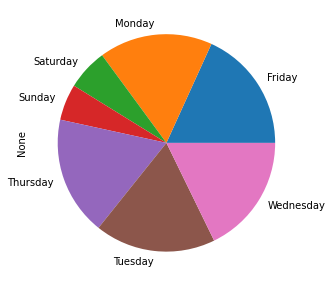

In [91]:
df.groupby(['day']).size().plot.pie(figsize=(5,5))

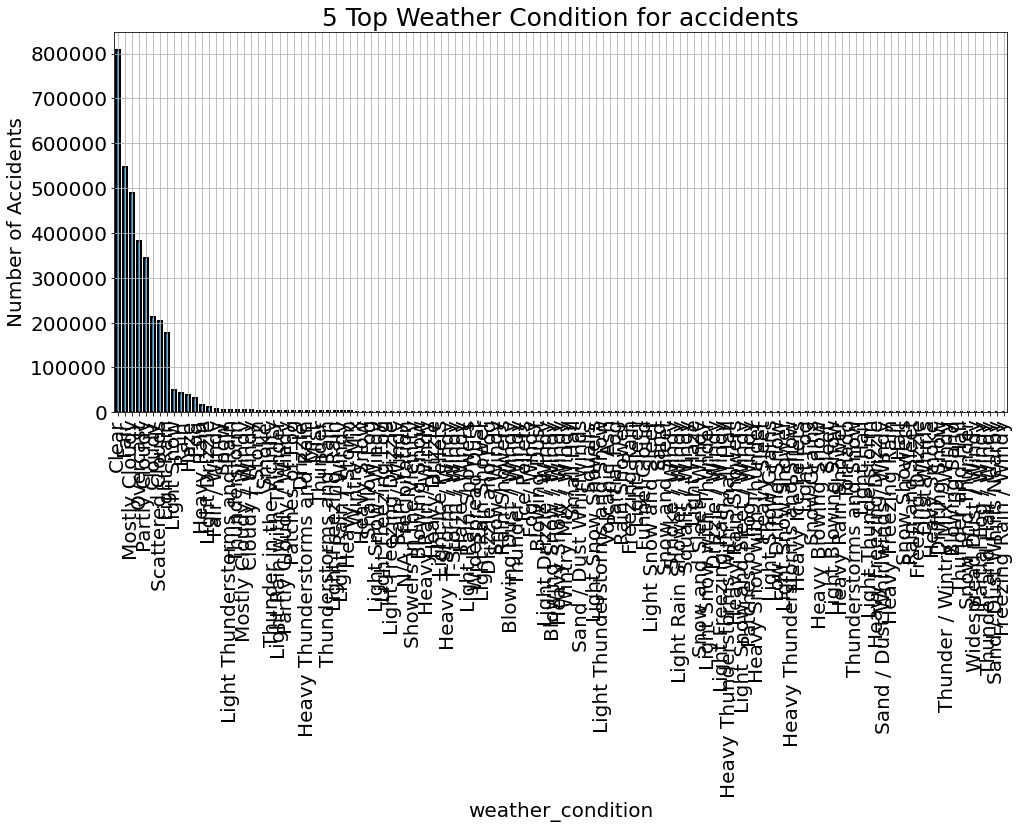

In [80]:
fig, ax=plt.subplots(figsize=(16,7))
df1['weather_condition'].value_counts().sort_values(ascending=False).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=2)
plt.xlabel('weather_condition',fontsize=20)
plt.ylabel('Number of Accidents',fontsize=20)
ax.tick_params(labelsize=20)
plt.title('5 Top Weather Condition for accidents',fontsize=25)
plt.grid()
plt.ioff()

In [10]:
df1.columns

Index(['Unnamed: 0', 'id', 'source', 'severity', 'start_time', 'end_time',
       'start_lat', 'start_lng', 'description', 'side', 'city', 'state',
       'temperature(f)', 'humidity(%)', 'pressure(in)', 'visibility(mi)',
       'wind_direction', 'wind_speed(mph)', 'weather_condition', 'amenity',
       'bump', 'crossing', 'give_way', 'junction', 'no_exit', 'railway',
       'roundabout', 'station', 'stop', 'traffic_calming', 'traffic_signal',
       'sunrise_sunset'],
      dtype='object')

In [96]:
x = df1['humidity(%)']
y = df1['temperature(f)']
z = df1['visibility(mi)']

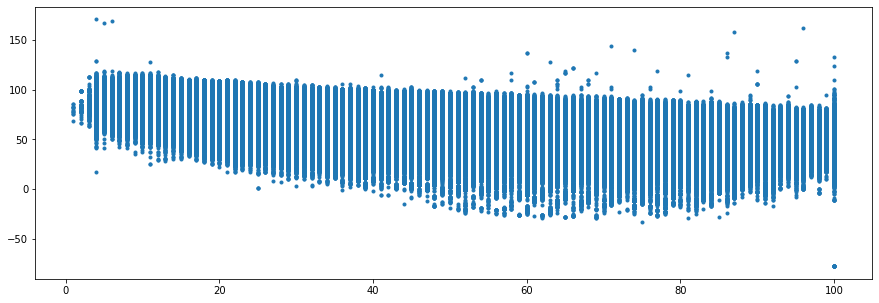

In [97]:
plt.figure(figsize =(15,5))
plt.scatter(x, y, marker='.');

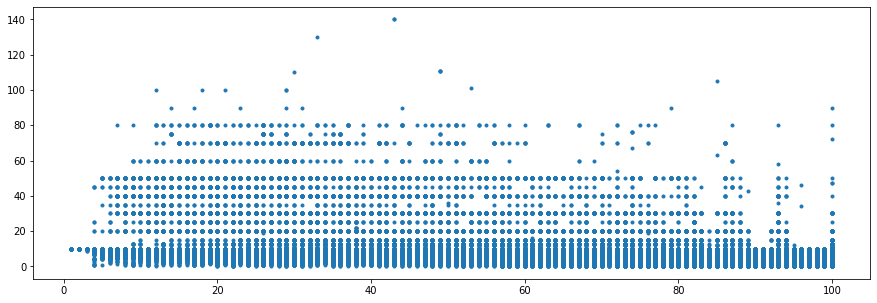

In [98]:
plt.figure(figsize =(15,5))
plt.scatter(x, z, marker='.');

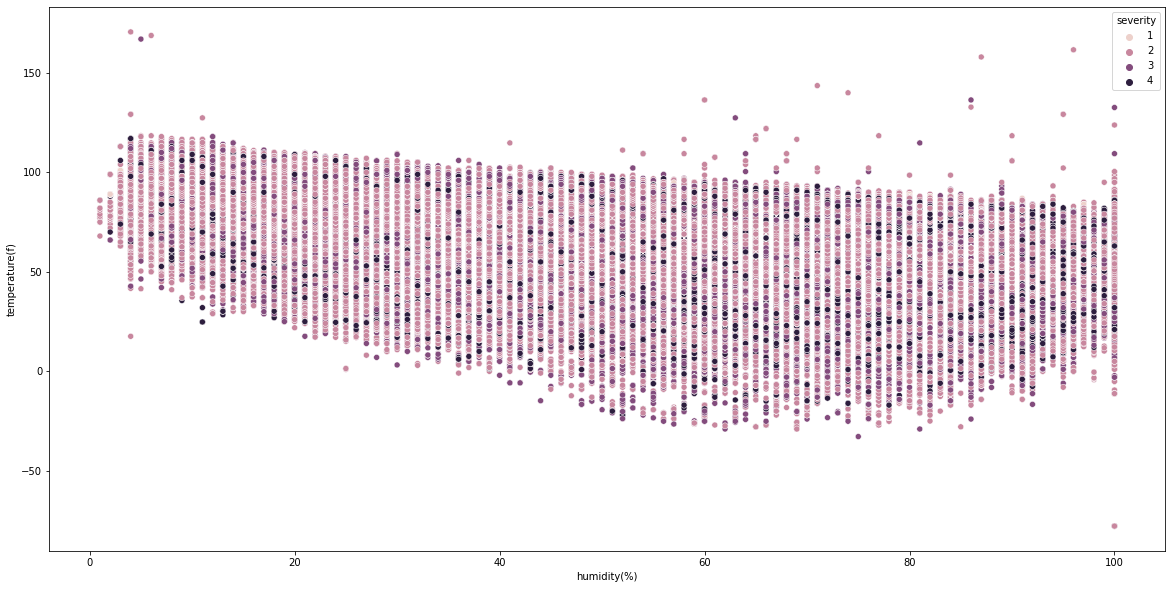

In [65]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='humidity(%)',y='temperature(f)',hue='severity',data=df1)

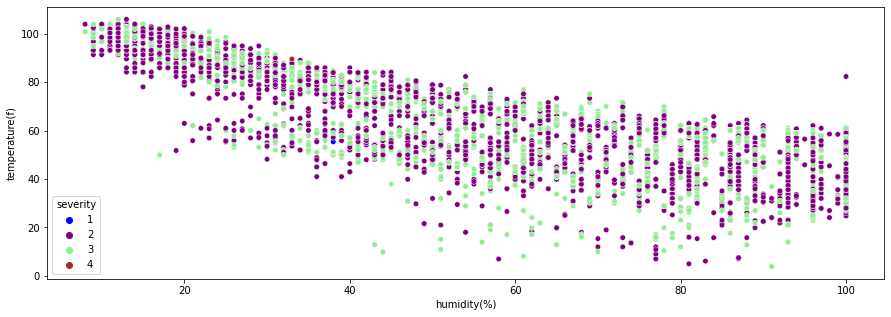

In [78]:
plt.figure(figsize=(15,5))
df2 = df1[:10000]
sns.scatterplot(x='humidity(%)',y='temperature(f)',hue='severity',palette=['blue','purple','lightgreen','brown'],s=30,data=df2)